# Maternal Health Risk Dataset : Classification

**Data description**:
Age: Any ages in years when a women during pregnant.
SystolicBP: Upper value of Blood Pressure in mmHg, another significant attribute during pregnancy.
DiastolicBP: Lower value of Blood Pressure in mmHg, another significant attribute during pregnancy.
BS: Blood glucose levels is in terms of a molar concentration, mmol/L.
HeartRate: A normal resting heart rate in beats per minute.
Risk Level: Predicted Risk Intensity Level during pregnancy considering the previous attribute.

**The objective**: of this analysis is to predict the risk of the population of mothers, using different classification algorithms: Logistic regression, decision tree, random forest etc

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv('./Maternal Health Risk Data Set.csv')
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


Some information about the dataset

In [4]:
df.shape

(1014, 7)

In [5]:
df.dtypes

Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel       object
dtype: object

In [6]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


Before starting our analysis we need to know if the target is balanced to take the proper decisions for the training of the data. As we can see in the bar chart, it is somewhat balanced

<AxesSubplot:>

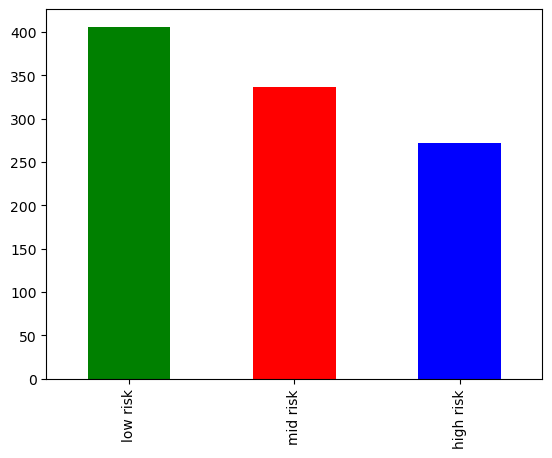

In [7]:
df['RiskLevel'].value_counts().plot.bar(color=['green', 'red','blue'])

### Feature engeneering: Incoding the target
low risk=0
mid risk=1
high risk=2

In [8]:
scale={"low risk":0,"mid risk":1,"high risk":2}
df["RiskLevel"] = df["RiskLevel"].replace(scale)
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,2
1,35,140,90,13.0,98.0,70,2
2,29,90,70,8.0,100.0,80,2
3,30,140,85,7.0,98.0,70,2
4,35,120,60,6.1,98.0,76,0


### Correlation matrix
In the heatmap below we can see tha Bs and Risk level are highly correlated, meaning that this could affect the outcome of our model

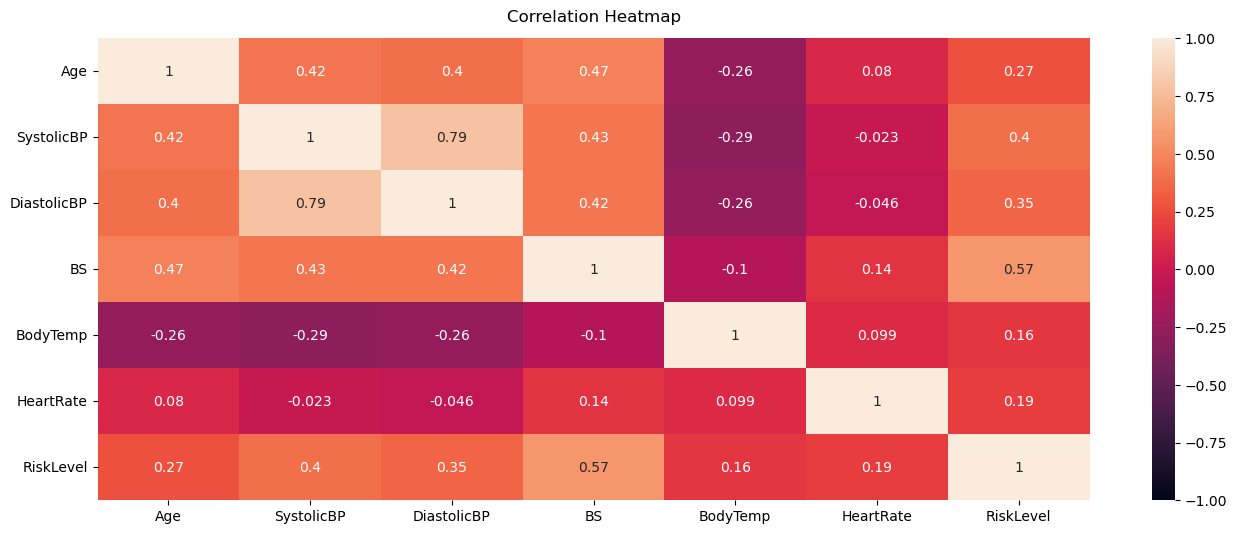

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [10]:
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score

#### Function for evaluationg our different models

In [11]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp)
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

### Feature engeneering: scaling for logistic regression

In [12]:
X_log=df.iloc[:, :-1]
y_log=df.iloc[:, -1:]
scaler = MinMaxScaler()
X_log=scaler.fit_transform(X_log)

In [13]:
Xlog_train, Xlog_test, ylog_train, ylog_test = train_test_split(X_log, y_log, test_size=0.2, stratify=y_log, random_state = 42)

## Logistic regression

In [14]:
# L1 penalty to shrink coefficients without removing any features from the model
penalty= 'l1'
# Our classification problem is multinomial
multi_class = 'multinomial'
# Use lbfgs for L2 penalty and multinomial classes
solver = 'saga'
# Max iteration = 1000
max_iter = 1000

In [15]:
# Define a logistic regression model with above arguments
l1_model = LogisticRegression(random_state=42, penalty=penalty, multi_class=multi_class, solver=solver, max_iter=max_iter)
l1_model.fit(Xlog_train, ylog_train)
l1_preds = l1_model.predict(Xlog_test)

In [16]:
evaluate_metrics(ylog_test, l1_preds)

{'accuracy': 0.6502463054187192,
 'recall': array([0.80246914, 0.32835821, 0.81818182]),
 'precision': array([0.65      , 0.5       , 0.76271186]),
 'f1score': array([0.71823204, 0.3963964 , 0.78947368])}

#### function to draw confusion matrix

In [17]:
def conf(y_test,ypred):
    cf = confusion_matrix(y_test,ypred)
    plt.figure(figsize=(4, 4))
    ax = sns.heatmap(cf, annot=True, fmt="d", xticklabels=["low risk", "mid risk", "high risk"], 
                 yticklabels=["low risk", "mid risk", "high risk"])

#cf = confusion_matrix(ylog_test, l1_preds)


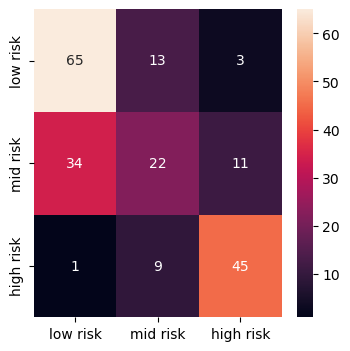

In [18]:
conf(ylog_test, l1_preds)

plotting our logistict regression

In [19]:
sns.regplot(x=X_log[:,2], y=y, data=df, logistic=True, ci=None)

NameError: name 'y' is not defined

I wasn't satisfied with the outcome of this algorithm, so i tried improving it by removing correlated features, checking for outliers but it was still the best outcome

## Decision Tree with GridSearchcv

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
X=df.iloc[:, :-1]
y=df.iloc[:, -1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = 42)
params_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3,5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5]
}
model_tree = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator = model_tree, 
                        param_grid = params_grid, 
                        scoring='f1',
                        cv = 3, verbose = 1)
grid_search.fit(X_train, y_train.values.ravel())
best_params = grid_search.best_params_
best_params

Fitting 3 folds for each of 30 candidates, totalling 90 fits


{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1}

In [21]:
model_tree2 = DecisionTreeClassifier(random_state=42,criterion='gini',max_depth=3,min_samples_leaf=1)
model_tree2.fit(X_train,y_train)
pred_tree=model_tree2.predict(X_test)
evaluate_metrics(y_test, pred_tree)

{'accuracy': 0.6354679802955665,
 'recall': array([0.50617284, 0.58208955, 0.89090909]),
 'precision': array([0.67213115, 0.46428571, 0.84482759]),
 'f1score': array([0.57746479, 0.51655629, 0.86725664])}

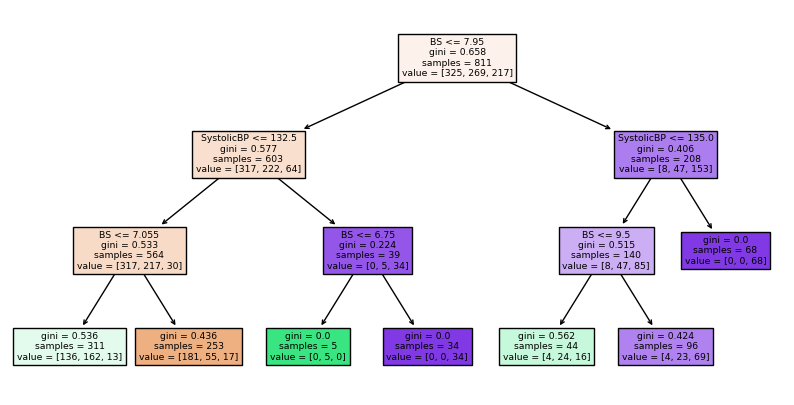

In [24]:
from sklearn import tree
def plot_decision_tree(model, feature_names):
    plt.subplots(figsize=(10, 5)) 
    tree.plot_tree(model, 
                       feature_names=feature_names,  
                       filled=True)
    plt.show()
feature_names = X.columns.values
plot_decision_tree(model_tree2, feature_names)

## Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
n_estimators=20
M_features=X.shape[1]
max_features=round(np.sqrt(M_features))-1
model_forest = RandomForestClassifier( max_features=max_features,n_estimators=n_estimators, random_state=0)
model_forest.fit(X_train,y_train)
pred_forest=model_forest.predict(X_test)
evaluate_metrics(y_test, pred_forest)

{'accuracy': 0.8522167487684729,
 'recall': array([0.82716049, 0.79104478, 0.96363636]),
 'precision': array([0.85897436, 0.81538462, 0.88333333]),
 'f1score': array([0.8427673 , 0.8030303 , 0.92173913])}

## SVM

In [26]:
from sklearn.svm import SVC
params_grid = {
    'C': [1,10,100,1000],
    'kernel': ['poly', 'rbf', 'sigmoid']
}
model = SVC()
# Define a GridSearchCV to search the best parameters
grid_search = GridSearchCV(estimator = model, 
                           param_grid = params_grid, 
                           scoring='f1',
                           cv = 5, verbose = 1)
# Search the best parameters with training data
#don't forget to use the scaled data
grid_search.fit(Xlog_train, ylog_train.values.ravel())
best_params = grid_search.best_params_
best_params

Fitting 5 folds for each of 12 candidates, totalling 60 fits


{'C': 1, 'kernel': 'poly'}

In [27]:
svc_model = SVC(C=10, kernel='poly')
svc_model.fit(Xlog_train, ylog_train)
pred_svc=svc_model.predict(Xlog_test)
evaluate_metrics(ylog_test, pred_svc)

{'accuracy': 0.7044334975369458,
 'recall': array([0.85185185, 0.3880597 , 0.87272727]),
 'precision': array([0.66990291, 0.63414634, 0.81355932]),
 'f1score': array([0.75      , 0.48148148, 0.84210526])}

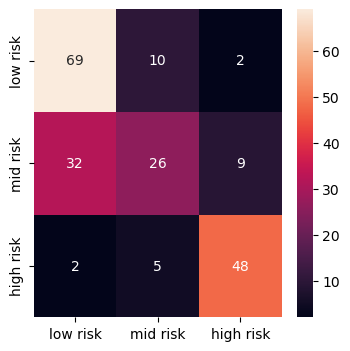

In [28]:
conf(ylog_test, pred_svc)

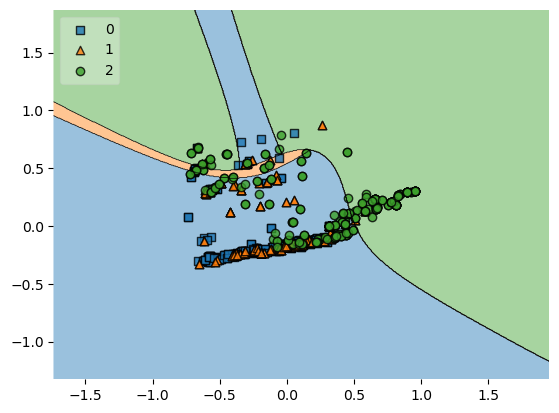

In [30]:
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
Xreduced = pca.fit_transform(X_log)

svc_model = SVC(C=10, kernel='poly')
svc_model.fit(Xreduced, y)
plot_decision_regions(Xreduced, y.values.ravel(), clf=svc_model, legend=2)
plt.show()

## Conclusion
The best results we had were with random forest classifiers,we had the highest accuracy and f1 score.
For the other algorithms, i need to do more research to understand how the different coeficients, and how hyperparameters can influence the outcome of these models. I know i still have a long way to go to master classification, but i hope it's a great start